# King County First Time Home Buyer Model

Are you looking for your first home in around the King County area? Not sure what your money can buy? Uneasy about what kind of home you can afford? Well, look no further! Below we create and explore a multiple linear regression model for people looking to purchase their first home!


In [1537]:
#importing necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import sklearn
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import warnings
import matplotlib.patches as mpatches
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from itertools import combinations
from sklearn.model_selection import KFold
from numpy import mean
from numpy import absolute
from numpy import sqrt

# Suppress Warning
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [1538]:
#importing our data from King County
data = pd.read_csv('data/kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [1539]:
#checking the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [1540]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [1541]:
#changing basement to int to prevent future issues
data['sqft_basement'] = data['sqft_basement'].astype(str)
data['sqft_basement'] = pd.to_numeric(data['sqft_basement'], errors='coerce')

In [1542]:
#changing missing values for waterfront and sqft basement properties to zero
data['waterfront'] = data['waterfront'].fillna(0.0)
data['sqft_basement'] = data['sqft_basement'].fillna(0.0)

In [1543]:
#dropping columns that I won't be using
data.drop(columns=['lat', 'long', 'date', 'view', 'sqft_lot15', 'sqft_living15', 'zipcode', 'yr_renovated', 'sqft_above', 'id', 'yr_built'], inplace=True)

In [1544]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,0.0
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,400.0
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,0.0
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,910.0
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,0.0


In [1545]:
#Renaming columns 
data = data.rename(columns = {'price': 'Price', 'bedrooms': 'Bedrooms', 'bathrooms': 'Bathrooms', 'sqft_living': 'Living', 'sqft_lot': 'Lot', 'floors': 'Floors', 'waterfront': 'Waterfront', 'condition': "Condition", 'grade': 'Grade', 'sqft_basement': 'Basement'}, inplace = False)

In [1546]:
#dropping outliers here; so far just the 33 bedrooms row
data = data[data['Bedrooms'] <= 12]
data.describe()

,Price,Bedrooms,Bathrooms,Living,Lot,Floors,Waterfront,Condition,Grade,Basement
count,2.159600e+04,21596.000000,21596.000000,21596.000000,2.159600e+04,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,5.402920e+05,3.371828,2.115843,2080.343165,1.509983e+04,1.494119,0.006761,3.409752,7.657946,285.702954
std,3.673760e+05,0.904114,0.768998,918.122038,4.141355e+04,0.539685,0.081946,0.650471,1.173218,439.825454
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,3.000000,7.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068550e+04,2.000000,0.000000,4.000000,8.000000,550.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,4820.000000


In [1547]:
data = data.loc[(data['Grade'] >= 6) & (data['Grade'] <= 10)]
data = data.loc[(data['Condition'] >= 3)]
data = data.loc[(data['Price'] >= 0.0) & (data['Price'] <= 1000000)]
data

,Price,Bedrooms,Bathrooms,Living,Lot,Floors,Waterfront,Condition,Grade,Basement
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,0.0
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,400.0
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,0.0
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,910.0
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,0.0
...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,0.0
21593,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,0.0
21594,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,0.0
21595,400000.0,3,2.50,1600,2388,2.0,0.0,3,8,0.0


In the cells above we refined the data to more manageable chunks for our model, including dropping an outlier from the bedroom column in addition to lowering the price range for our buyers to one million dollars and under. (This is their first home after all, don't want to spend all their savings!)

We also want our first time home buyers to be reassured that the home they can afford will be at least a grade of 6 (where there are a few lower quality materials and more simplistic designs) to a highest of 10 (higher quality of features and usually more square footage) on the King County grading scale. Furthermore, we have also filtered the houses by King County's condition to at least a 3 (or in words, and average home that need only minor repairs). 

This filtering was done since generally most first time home buyers are not looking for full renovations and are not looking to do any major repairs (if anything, usually just cosmetic features wish to be done).

# Correlations and Other Fun Inquiries
Here we take a brief stop before continuing on to check for correlations, cross validations and distributions as these can skew the results of our model.

In [1548]:
data.corr()

,Price,Bedrooms,Bathrooms,Living,Lot,Floors,Waterfront,Condition,Grade,Basement
Price,1.000000,0.278205,0.418748,0.589178,0.099504,0.254704,0.056271,0.026525,0.602176,0.215622
Bedrooms,0.278205,1.000000,0.489485,0.595976,0.031197,0.143382,-0.021081,0.013811,0.294079,0.276716
Bathrooms,0.418748,0.489485,1.000000,0.698760,0.066955,0.497112,-0.000578,-0.161462,0.587964,0.201425
Living,0.589178,0.595976,0.698760,1.000000,0.165458,0.322541,0.006518,-0.088170,0.676690,0.364908
Lot,0.099504,0.031197,0.066955,0.165458,1.000000,-0.019779,0.027966,0.008904,0.103715,0.010299
Floors,0.254704,0.143382,0.497112,0.322541,-0.019779,1.000000,-0.003792,-0.301580,0.453435,-0.307268
Waterfront,0.056271,-0.021081,-0.000578,0.006518,0.027966,-0.003792,1.000000,0.012956,-0.004972,0.022433
Condition,0.026525,0.013811,-0.161462,-0.088170,0.008904,-0.301580,0.012956,1.000000,-0.202545,0.175416
Grade,0.602176,0.294079,0.587964,0.676690,0.103715,0.453435,-0.004972,-0.202545,1.000000,0.045650
Basement,0.215622,0.276716,0.201425,0.364908,0.010299,-0.307268,0.022433,0.175416,0.045650,1.000000


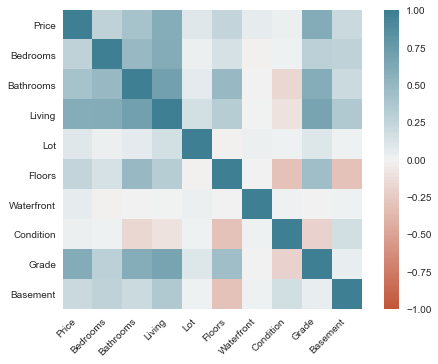

In [1549]:
#using heatmap to show these correlations and checking multilinearity
import seaborn as sns
corr = data.corr()
axes = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, horizontalalignment='right');

In [1550]:
#creating correlation pairs
corr = data.corr().abs().stack().reset_index().sort_values(0, ascending=False)
display(corr)

#setting the indexx to the pair of variables
corr['pairs'] = list(zip(corr.level_0, corr.level_1))
corr.set_index(['pairs'], inplace = True)
corr.drop(columns=['level_1', 'level_0'], inplace = True)

#cc for correlation coefficient
corr.columns = ['cc']

corr.drop_duplicates(inplace=True)
corr[(corr.cc>.5) & (corr.cc<1)]

,level_0,level_1,0
0,Price,Price,1.000000
11,Bedrooms,Bedrooms,1.000000
88,Grade,Grade,1.000000
77,Condition,Condition,1.000000
66,Waterfront,Waterfront,1.000000
...,...,...,...
68,Waterfront,Grade,0.004972
56,Floors,Waterfront,0.003792
65,Waterfront,Floors,0.003792
62,Waterfront,Bathrooms,0.000578


,cc
pairs,
"(Bathrooms, Living)",0.698760
"(Living, Grade)",0.676690
"(Grade, Price)",0.602176
"(Bedrooms, Living)",0.595976
"(Price, Living)",0.589178
"(Grade, Bathrooms)",0.587964


As seen there are some higher correlations between these variables but not too high to where it makes a significant difference on the model to drop them entirely. So we continue in our pursuit to look at linearity among our variables.

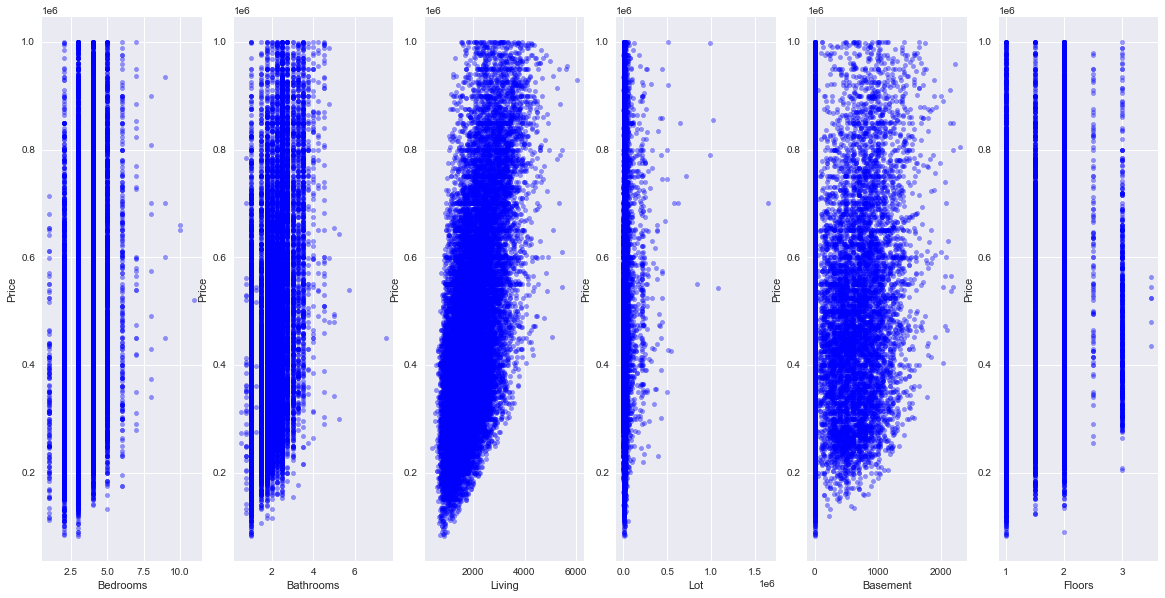

In [1551]:
#checking for linearity
#doing graphs for all columns against price that are continuous;
#checking for linearity
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(20,10))

for xcol, ax in zip(['Bedrooms', 'Bathrooms', 'Living', 'Lot', 'Basement', 'Floors'], axes):
    data.plot(kind='scatter', x=xcol, y='Price', ax=ax, alpha=0.4, color='b')

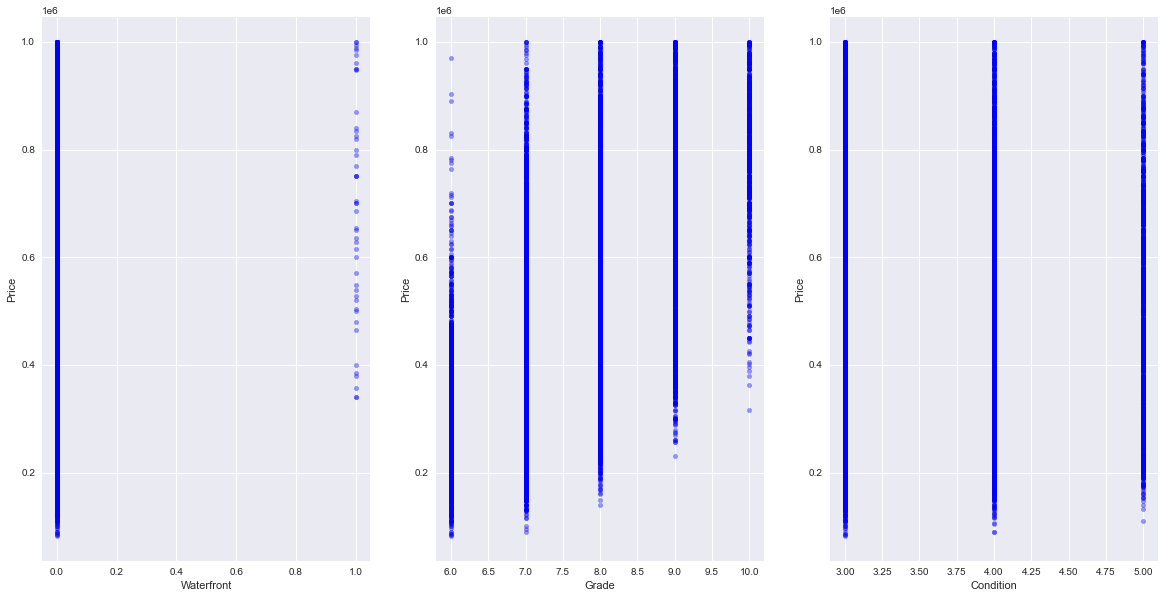

In [1552]:
#doing graphs for all columns against price that are categorical;
#checking for linearity
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,10))

for xcol, ax in zip(['Waterfront', 'Grade', 'Condition'], axes):
    data.plot(kind='scatter', x=xcol, y='Price', ax=ax, alpha=0.4, color='b')

The graphs above are hard to read to check for linearity so next we'll run a bare bones model before doing any more transformations on our data to get a general baseline of what we can infer.

In [1553]:
#Doing the statsmodel and sklearn seperately to see how coding going later on
y = data[['Price']]
x = data[['Bedrooms', 'Bathrooms', 'Living', 'Lot', 'Basement', 'Waterfront', 'Grade', 'Condition']]

#statsmodel
formula = 'Price ~ Bedrooms+Bathrooms+Living+Lot+Basement+Waterfront+Grade+Condition'
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     2018.
Date:                Tue, 03 Aug 2021   Prob (F-statistic):               0.00
Time:                        23:06:09   Log-Likelihood:            -2.6064e+05
No. Observations:               19607   AIC:                         5.213e+05
Df Residuals:                   19598   BIC:                         5.214e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.565e+05   1.26e+04    -36.108      0.000   -4.81e+05   -4.32e+05
Bedrooms   -1.157e+04   1523.937     -7.589      0.000   -1.46e+04   -8578.609
Bathrooms   -1.24e+04   2173.517     -5.707      0.000   -1.67e+04   -8144.221
Living        89.7997      2.673     33.595      0.000      84.560      95.039
Lot           -0.0043      0.027     -0.156      0.876      -0.058       0.049
Basement      34.2957      2.914     11.768      0.000      28.583      40.008
Waterfront  2.078e+05   2.12e+04      9.797      0.000    1.66e+05    2.49e+05
Grade       8.938e+04   1621.573     55.117      0.000    8.62e+04    9.26e+04
Condition   3.858e+04   1709.765     22.565      0.000    3.52e+04    4.19e+04
==============================================================================
Omnibus:                      675.218   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              750.739
Skew:                           0.459   Prob(JB):                    9.53e-164
Kurtosis:                       3.279   Cond. No.                     8.46e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Our R-squared isn't very high at 45.2% predicting power for our data, but luckily there are almost all zeroes for our p-values, which would mean these variables are significant to our model. For the one high p-value for Lot, we will transform the data so that hopefully our R-squared value will increase and Lot's p-value will decrease.

In [1554]:
#sklearn
linreg = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
linreg.fit(x_train, y_train)

y_hat_train = linreg.predict(x_train)
y_hat_test = linreg.predict(x_test)


train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print("Train R2: ", linreg.score(x_train, y_train))
print("Test R2: ", linreg.score(x_test, y_test))
    
print("Train RMSE: ", train_mse**0.5)
print("Test RMSE: ", test_mse**0.5)

Train R2:  0.4596784657291836
Test R2:  0.41798432916599526
Train RMSE:  142743.68799212514
Test RMSE:  146578.22250174498


Both test and train data for R-squared and RMSE seem relatively close, but again, let's see what we can do to get better results.

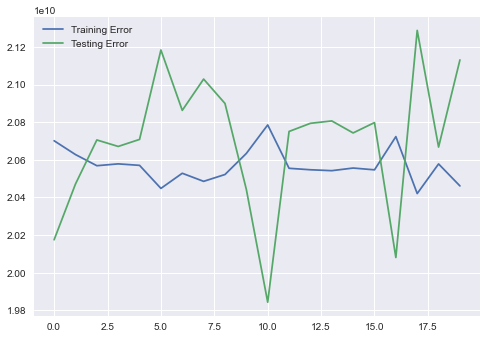

In [1555]:
#cross validation of model before transformations
linreg = LinearRegression()

num = 20 
train_err = []
test_err = []
for i in range(num):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    
    linreg.fit(x_train, y_train)
    y_hat_train = linreg.predict(x_train)
    
    y_hat_test = linreg.predict(x_test)
    
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
    
plt.plot(list(range(num)), train_err, label='Training Error')
plt.plot(list(range(num)), test_err, label='Testing Error')
plt.legend();

In [1556]:
#new way to do cross validation of model before transformations

regression = LinearRegression()
crossvalidation = KFold(n_splits=3, shuffle=True, random_state=1)

baseline = np.mean(cross_val_score(regression, x, y, scoring='r2', cv=crossvalidation))
baseline

0.45052846337461805

Here we can see the cross validation of the model between the training and testing error, indicating that this model, unchanged, is under fitted with a score of 0.4505. We'll see later how this number holds up against our final cross validation score. 

<ipython-input-1557-99fd72e6b08c>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


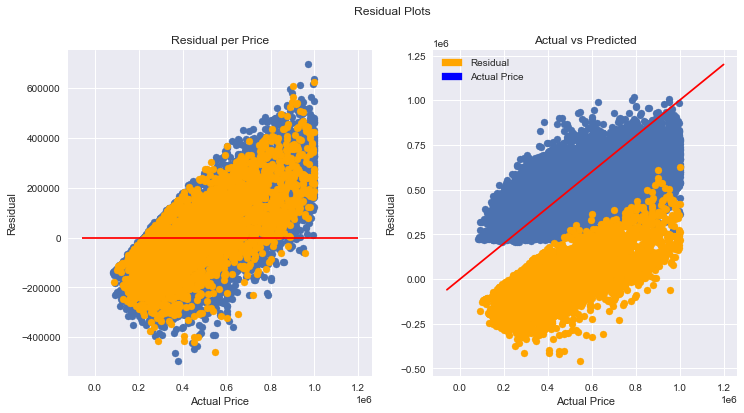

In [1557]:
#check homoscedasticity and normalization of untransformed data; want equal variance throughout
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Residual Plots')

axes[0].scatter(y_train, y_train-y_hat_train)
axes[0].scatter(y_test, y_test-y_hat_test, color='orange')
axes[0].set(xlabel='Actual Price', ylabel='Residual', title='Residual per Price')
axes[0].hlines(0, xmin=-60000, xmax=1200000, colors='red')

axes[1].scatter(y_train, y_hat_train)
axes[1].scatter(y_test, y_test-y_hat_test, color='orange')
axes[1].plot([-60000, 1200000], [-60000, 1200000], color='red', linestyle='-')
axes[1].set(xlabel='Actual Price', ylabel='Residual', title='Actual vs Predicted')

orange_patch = mpatches.Patch(color='orange', label='Residual')
blue_patch = mpatches.Patch(color='blue', label='Actual Price')

plt.legend(handles=[orange_patch, blue_patch])

fig.show()

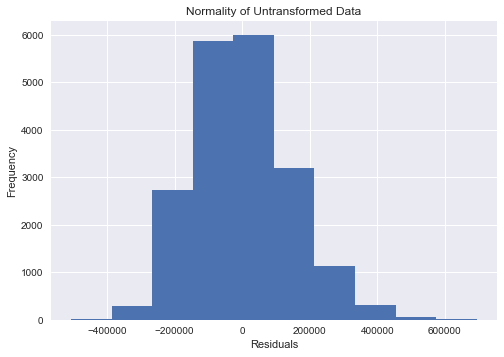

In [1558]:
#normality check
plt.hist(model.resid)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Normality of Untransformed Data');

Again, the unchanged model provides graphs to indicate that transformations are needed since both the homoscedasticity and normality indicate that variances are not equal. 

# Logging
Here will start actually transforming our data for the model starting with logging. This is will hopefully make our data fit the model better, so we will start with our dependent variable y (or otherwise known as Price) first.

In [1559]:
#logging price to see if it makes a difference in model
y = np.log(data[['Price']])

data['Price'] = np.log(data['Price'])
formula = 'Price ~ Bedrooms+Bathrooms+Living+Lot+Basement+Waterfront+Grade+Condition'
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     1843.
Date:                Tue, 03 Aug 2021   Prob (F-statistic):               0.00
Time:                        23:06:11   Log-Likelihood:                -5492.1
No. Observations:               19607   AIC:                         1.100e+04
Df Residuals:                   19598   BIC:                         1.107e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.0018      0.028    390.048      0.000      10.947      11.057
Bedrooms      -0.0241      0.003     -7.099      0.000      -0.031      -0.017
Bathrooms     -0.0006      0.005     -0.129      0.897      -0.010       0.009
Living         0.0002   5.96e-06     28.547      0.000       0.000       0.000
Lot         2.738e-08    6.1e-08      0.449      0.654   -9.22e-08    1.47e-07
Basement    9.137e-05    6.5e-06     14.051      0.000    7.86e-05       0.000
Waterfront     0.3927      0.047      8.297      0.000       0.300       0.486
Grade          0.1904      0.004     52.627      0.000       0.183       0.198
Condition      0.0763      0.004     19.991      0.000       0.069       0.084
==============================================================================
Omnibus:                       78.570   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.174
Skew:                          -0.108   Prob(JB):                     3.51e-16
Kurtosis:                       2.799   Cond. No.                     8.46e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1560]:
linreg = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
linreg.fit(x_train, y_train)

y_hat_train = linreg.predict(x_train)
y_hat_test = linreg.predict(x_test)


train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print("Train R2: ", linreg.score(x_train, y_train))
print("Test R2: ", linreg.score(x_test, y_test))
    
print("Train RMSE: ", train_mse**0.5)
print("Test RMSE: ", test_mse**0.5)

Train R2:  0.42865712917223364
Test R2:  0.4317072669004224
Train RMSE:  0.32101964346474804
Test RMSE:  0.31701333862790615


Changes did occur in R-squared but it unfortunately was for the worse but luckily it does seem that for both the train/test RMSE, the values were similar.

Since changing only Price didn't work out that well, we will now log transform a majority of the independent variables to see if that improves our results.

In [1561]:
x = np.log(data[['Bedrooms', 'Bathrooms', 'Living', 'Lot']])

data['Bedrooms'] = np.log(data['Bedrooms'])
data['Bathrooms'] = np.log(data['Bathrooms'])
data['Living'] = np.log(data['Living'])
data['Lot'] = np.log(data['Lot'])
data['Floors'] = np.log(data['Floors'])

In [1562]:
formula = 'Price ~ Bedrooms+Bathrooms+Living+Lot+Basement+Waterfront+Grade+Condition'
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     1955.
Date:                Tue, 03 Aug 2021   Prob (F-statistic):               0.00
Time:                        23:06:11   Log-Likelihood:                -5240.5
No. Observations:               19607   AIC:                         1.050e+04
Df Residuals:                   19598   BIC:                         1.057e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.4207      0.071    118.504      0.000       8.281       8.560
Bedrooms      -0.1324      0.011    -12.054      0.000      -0.154      -0.111
Bathrooms     -0.0806      0.009     -8.640      0.000      -0.099      -0.062
Living         0.4687      0.013     37.420      0.000       0.444       0.493
Lot           -0.0520      0.003    -18.467      0.000      -0.057      -0.046
Basement    7.281e-05   6.45e-06     11.297      0.000    6.02e-05    8.54e-05
Waterfront     0.4262      0.047      9.107      0.000       0.334       0.518
Grade          0.1863      0.004     53.037      0.000       0.179       0.193
Condition      0.0825      0.004     21.809      0.000       0.075       0.090
==============================================================================
Omnibus:                       81.133   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.130
Skew:                          -0.123   Prob(JB):                     2.94e-17
Kurtosis:                       2.820   Cond. No.                     1.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1563]:
linreg = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
linreg.fit(x_train, y_train)

y_hat_train = linreg.predict(x_train)
y_hat_test = linreg.predict(x_test)


train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print("Train R2: ", linreg.score(x_train, y_train))
print("Test R2: ", linreg.score(x_test, y_test))
    
print("Train RMSE: ", train_mse**0.5)
print("Test RMSE: ", test_mse**0.5)

Train R2:  0.35390110107156314
Test R2:  0.3559535676714024
Train RMSE:  0.3409857972918788
Test RMSE:  0.33903295675330647


Improvement! By log transforming the variables Bedrooms, Bathrooms, Living, Lot and Floors, our R-squared went up, the p-values zeroed out and the RMSE equalized even more!

Now you may be wondering why we did not transform all of the independent variables since the ones we did improved our model. Simply put, the ones not done were either categorical (and therefore not a good choice to log transform) and the other, Basement, had been transformed but caused problems within the model.

Next we'll look at some graphs that will show us more of linear relationship between our variables.

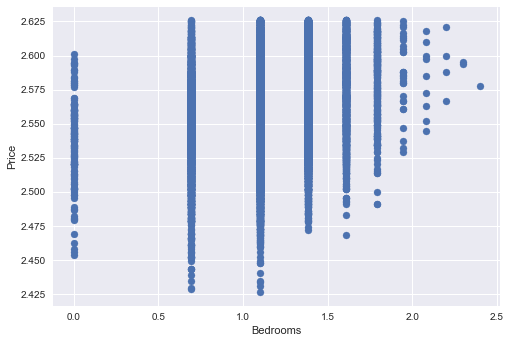

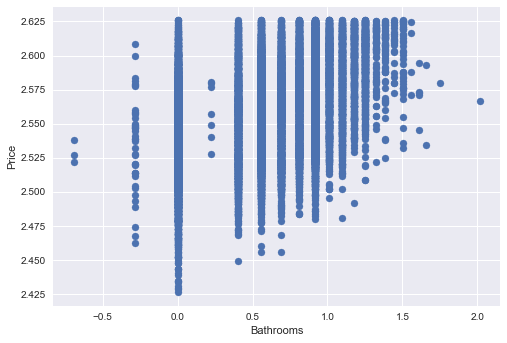

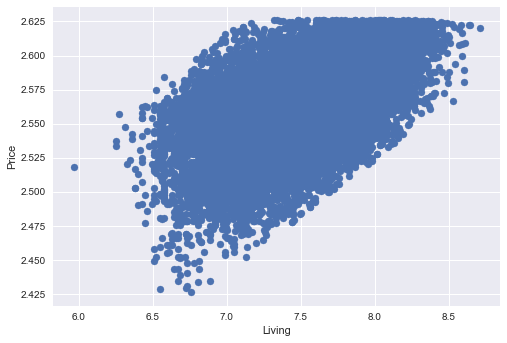

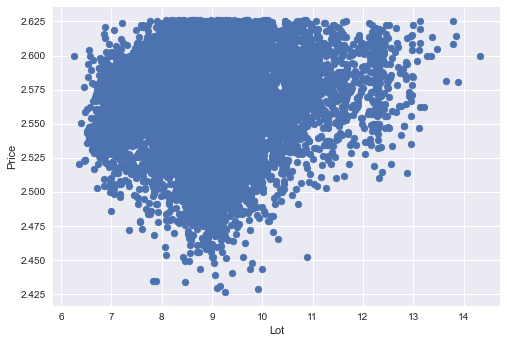

In [1564]:
for col in x.columns:
    fig = plt.figure
    ax = plt.gca()
    ax.scatter(x[col], np.log(y))
    
    ax.set_xlabel(col)
    ax.set_ylabel('Price')
    
    plt.show()

While our graphs look a little bit better than they did before, there are still more transformations to be done to make their connections more obvious.

# Dummy Variables
Next up on our evolution train is dummy variables! Now while they sound silly, these dummy variables will help our model by giving us some more insight into our categorical variables. In this instance, we have three: Waterfront, Grade and Condition. 

The following code will create artificial attributes to test whether these variables can cause a shift in our model results. The only one not included was waterfront since when tested, did not have any effect on our model.

In [1565]:
#treating grade and condition as categorical and getting dummies for them
grade_dummies = pd.get_dummies(data['Grade'], prefix='grde', drop_first=True)
con_dummies = pd.get_dummies(data['Condition'], prefix='con', drop_first=True)

data = pd.concat([data, grade_dummies, con_dummies], axis=1)
data = data.drop(['Grade', 'Condition'], axis=1)
data.head()

,Price,Bedrooms,Bathrooms,Living,Lot,Floors,Waterfront,Basement,grde_7,grde_8,grde_9,grde_10,con_4,con_5
0,12.309982,1.098612,0.000000,7.073270,8.639411,0.000000,0.0,0.0,1,0,0,0,0,0
1,13.195614,1.098612,0.810930,7.851661,8.887653,0.693147,0.0,400.0,1,0,0,0,0,0
2,12.100712,0.693147,0.000000,6.646391,9.210340,0.000000,0.0,0.0,0,0,0,0,0,0
3,13.311329,1.386294,1.098612,7.580700,8.517193,0.000000,0.0,910.0,1,0,0,0,0,1
4,13.142166,1.098612,0.693147,7.426549,8.997147,0.000000,0.0,0.0,0,1,0,0,0,0


In [1566]:
#Doing the statsmodel and sklearn seperately to see how coding going later on
y = data[['Price']]
x = data[['Bedrooms', 'Bathrooms', 'Living', 'Lot', 'Basement', 'Waterfront', 'grde_7', 'grde_8', 'grde_9', 'grde_10', 'con_4', 'con_5']]

#statsmodel
formula = 'Price ~ Bedrooms+Bathrooms+Living+Lot+Floors+Waterfront+Basement+grde_7+grde_8+grde_9+grde_10+con_4+con_5'
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     1211.
Date:                Tue, 03 Aug 2021   Prob (F-statistic):               0.00
Time:                        23:06:12   Log-Likelihood:                -5208.7
No. Observations:               19607   AIC:                         1.045e+04
Df Residuals:                   19593   BIC:                         1.056e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.8545      0.079    124.718      0.000       9.700      10.009
Bedrooms      -0.1280      0.011    -11.611      0.000      -0.150      -0.106
Bathrooms     -0.0980      0.010     -9.974      0.000      -0.117      -0.079
Living         0.4472      0.013     34.339      0.000       0.422       0.473
Lot           -0.0430      0.003    -13.663      0.000      -0.049      -0.037
Floors         0.0531      0.010      5.378      0.000       0.034       0.073
Waterfront     0.4154      0.047      8.883      0.000       0.324       0.507
Basement    9.578e-05   7.57e-06     12.656      0.000    8.09e-05       0.000
grde_7         0.1811      0.009     21.148      0.000       0.164       0.198
grde_8         0.3705      0.010     36.340      0.000       0.351       0.390
grde_9         0.5715      0.013     44.611      0.000       0.546       0.597
grde_10        0.6964      0.017     40.795      0.000       0.663       0.730
con_4          0.0725      0.005     13.259      0.000       0.062       0.083
con_5          0.1856      0.009     20.869      0.000       0.168       0.203
==============================================================================
Omnibus:                       70.750   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.202
Skew:                          -0.113   Prob(JB):                     4.21e-15
Kurtosis:                       2.826   Cond. No.                     1.72e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1567]:
#sklearn
linreg = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
linreg.fit(x_train, y_train)

y_hat_train = linreg.predict(x_train)
y_hat_test = linreg.predict(x_test)


train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print("Train R2: ", np.exp(linreg.score(x_train, y_train)))
print("Test R2: ", np.exp(linreg.score(x_test, y_test)))
    
print("Train RMSE: ", np.exp(train_mse**0.5))
print("Test RMSE: ", np.exp(test_mse**0.5))

Train R2:  1.5512019104545127
Test R2:  1.5948239804986515
Train RMSE:  1.3730730965912137
Test RMSE:  1.3648646182175503


Once again, small success but still success! Our R-squared went up and our test/train RMSE got closer in values! But what else can be done to fine tune our model?

# Interactions
To continue refining our model we will next check to see if there are any interactions between our variables that may be causing havoc on our results.

We'll first try out the combination of Lot size versus square footage of a home (or in this case known as the Living variable).

In [1568]:
#Checking Lot VS Living
regression_1 = LinearRegression()
regression_2 = LinearRegression()

lotshaped = data['Lot'].values.reshape(-1, 1)
livingshaped = data['Living'].values.reshape(-1, 1)

regression_1.fit(lotshaped, data['Price'])
regression_2.fit(livingshaped, data['Price'])

#making predictions using test set
pred_1 = regression_1.predict(lotshaped)
pred_2 = regression_2.predict(livingshaped)

#coefficiants
print(regression_1.coef_)
print(regression_2.coef_)

[0.03550368]
[0.63944452]


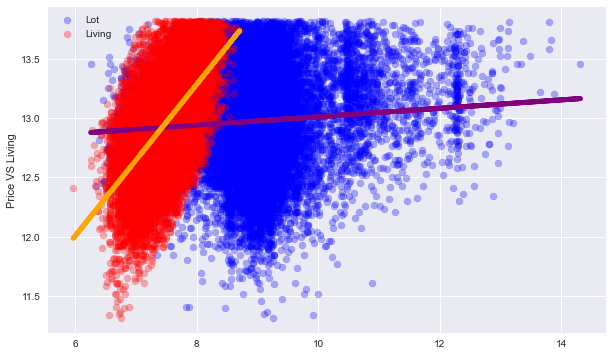

In [1569]:
#plotting the outputs to get a better look
plt.figure(figsize=(10,6))

plt.scatter(lotshaped, data['Price'], color='blue', alpha = 0.3, label = 'Lot')
plt.scatter(livingshaped, data['Price'], color='red', alpha = 0.3, label = 'Living')

plt.plot(lotshaped, pred_1, color='purple', linewidth=5)
plt.plot(livingshaped, pred_2, color='orange', linewidth=5)

plt.ylabel('Price VS Living')
plt.legend();

This graph can be a little hard to interpret but from the intersecting lines, we can infer that there might be some interactions between these two. To double check that, we'll run some more code below starting with the baseline regression without the hypothetical interaction and then following with the regression accounting for the interaction.

In [1570]:
#baseline without the interaction 
regression = LinearRegression()
crossvalidation = KFold(n_splits=3, shuffle=True, random_state=1)

baseline = np.mean(cross_val_score(regression, x, y, scoring='r2', cv=crossvalidation))
baseline

0.4435628125320085

In [1571]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=3, shuffle=True, random_state=1)

x_interact_2 = x.copy()
x_interact_2['lotliving'] = x['Lot'] * x['Living']

interact_origin = np.mean(cross_val_score(regression, x_interact_2, y, scoring='r2', cv=crossvalidation))
interact_origin

0.44507608787514275

In [1572]:
x_interact_2 = sm.add_constant(x_interact_2)
model = sm.OLS(y,x_interact_2)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     1216.
Date:                Tue, 03 Aug 2021   Prob (F-statistic):               0.00
Time:                        23:06:13   Log-Likelihood:                -5193.5
No. Observations:               19607   AIC:                         1.041e+04
Df Residuals:                   19593   BIC:                         1.053e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.2299      0.453     29.224      0.000      12.343      14.117
Bedrooms      -0.1190      0.011    -10.711      0.000      -0.141      -0.097
Bathrooms     -0.0907      0.010     -9.534      0.000      -0.109      -0.072
Living         0.0120      0.060      0.199      0.842      -0.106       0.130
Lot           -0.4426      0.051     -8.676      0.000      -0.543      -0.343
Basement    6.938e-05   6.49e-06     10.683      0.000    5.67e-05    8.21e-05
Waterfront     0.4289      0.047      9.185      0.000       0.337       0.520
grde_7         0.1770      0.009     20.686      0.000       0.160       0.194
grde_8         0.3654      0.010     35.743      0.000       0.345       0.385
grde_9         0.5631      0.013     43.722      0.000       0.538       0.588
grde_10        0.6740      0.017     38.751      0.000       0.640       0.708
con_4          0.0700      0.005     12.901      0.000       0.059       0.081
con_5          0.1837      0.009     20.734      0.000       0.166       0.201
lotliving      0.0518      0.007      7.705      0.000       0.039       0.065
==============================================================================
Omnibus:                       64.073   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.925
Skew:                          -0.112   Prob(JB):                     5.89e-14
Kurtosis:                       2.843   Cond. No.                     9.82e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1573]:
linreg = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
linreg.fit(x_train, y_train)

y_hat_train = linreg.predict(x_train)
y_hat_test = linreg.predict(x_test)


train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print("Train R2: ", (linreg.score(x_train, y_train)))
print("Test R2: ", (linreg.score(x_test, y_test)))
    
print("Train RMSE: ", (train_mse**0.5))
print("Test RMSE: ", (test_mse**0.5))

Train R2:  0.4448446525621357
Test R2:  0.444324661614912
Train RMSE:  0.31534612941942264
Test RMSE:  0.3178500933632883


In [1574]:
#adding lotliving to the data set
data['lotliving'] = data['Lot'] * data['Living']

Doesn't seem to be changing our results much by means of R-squared but the RMSE has improved so we'll be keeping this interaction. We will also test some more interactions below but it should be noted that even if variables are correlated, that doesn't necessarily mean they have interaction with each other.

In [1575]:
#Checking Waterfront VS basement
regression_1 = LinearRegression()
regression_2 = LinearRegression()

watershaped = data['Waterfront'].values.reshape(-1, 1)
baseshaped = data['Basement'].values.reshape(-1, 1)

regression_1.fit(watershaped, data['Price'])
regression_2.fit(baseshaped, data['Price'])

#making predictions using test set
pred_1 = regression_1.predict(watershaped)
pred_2 = regression_2.predict(baseshaped)

#coefficiants
print(regression_1.coef_)
print(regression_2.coef_)

[0.43086626]
[0.00023285]


In [1576]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=3, shuffle=True, random_state=1)

x_interact_2 = x.copy()
x_interact_2['waterbase'] = x['Waterfront'] * x['Basement']

interact_origin = np.mean(cross_val_score(regression, x_interact_2, y, scoring='r2', cv=crossvalidation))
interact_origin

0.44373740024193076

Our original cross validation score was about 0.4505, so our score went down a little but let's check our R-squared and RMSE.

In [1577]:
x_interact_2 = sm.add_constant(x_interact_2)
model = sm.OLS(y,x_interact_2)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     1208.
Date:                Tue, 03 Aug 2021   Prob (F-statistic):               0.00
Time:                        23:06:13   Log-Likelihood:                -5219.7
No. Observations:               19607   AIC:                         1.047e+04
Df Residuals:                   19593   BIC:                         1.058e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7923      0.078    125.121      0.000       9.639       9.946
Bedrooms      -0.1311      0.011    -11.908      0.000      -0.153      -0.110
Bathrooms     -0.0848      0.009     -8.933      0.000      -0.103      -0.066
Living         0.4664      0.013     37.188      0.000       0.442       0.491
Lot           -0.0502      0.003    -17.586      0.000      -0.056      -0.045
Basement    7.548e-05   6.48e-06     11.655      0.000    6.28e-05    8.82e-05
Waterfront     0.5382      0.064      8.444      0.000       0.413       0.663
grde_7         0.1798      0.009     20.997      0.000       0.163       0.197
grde_8         0.3733      0.010     36.620      0.000       0.353       0.393
grde_9         0.5762      0.013     45.032      0.000       0.551       0.601
grde_10        0.7016      0.017     41.131      0.000       0.668       0.735
con_4          0.0686      0.005     12.632      0.000       0.058       0.079
con_5          0.1816      0.009     20.470      0.000       0.164       0.199
waterbase     -0.0003   9.69e-05     -2.627      0.009      -0.000   -6.47e-05
==============================================================================
Omnibus:                       74.950   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.799
Skew:                          -0.120   Prob(JB):                     4.23e-16
Kurtosis:                       2.830   Cond. No.                     1.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1578]:
linreg = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
linreg.fit(x_train, y_train)

y_hat_train = linreg.predict(x_train)
y_hat_test = linreg.predict(x_test)


train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print("Train R2: ", (linreg.score(x_train, y_train)))
print("Test R2: ", (linreg.score(x_test, y_test)))
    
print("Train RMSE: ", (train_mse**0.5))
print("Test RMSE: ", (test_mse**0.5))

Train R2:  0.4482645140801347
Test R2:  0.4301723205017802
Train RMSE:  0.3154831132992713
Test RMSE:  0.31735020714706236


The interaction between waterfront and basement doesn't seem to be significant but the influence it does have on the model is that it improves the p-value for Living highly, so we will keep it.

In [1579]:
#adding waterbase to the data set
data['waterbase'] = data['Waterfront'] * data['Basement']

# Final Rounds

Ding Ding! Our final round is here! We will test how well it stands up to our original model where none of the data was modified or dropped. In addition, we'll also take a look at a QQ plot, a homoscedasticity plot and a normality plot to also help compare the original model to it's final form.

In [1580]:
#final model
y = data[['Price']]
x = data[['Bedrooms', 'Bathrooms', 'Living', 'Lot', 'Floors', 'Waterfront', 'Basement', 'lotliving', 'grde_7', 'grde_8', 'grde_9', 'grde_10', 'con_4', 'con_5', 'waterbase']]

formula = 'Price ~ Bedrooms+Bathrooms+Living+Lot+Floors+Waterfront+Basement+lotliving+grde_7+grde_8+grde_9+grde_10+con_4+con_5+waterbase'
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     1056.
Date:                Tue, 03 Aug 2021   Prob (F-statistic):               0.00
Time:                        23:06:13   Log-Likelihood:                -5182.7
No. Observations:               19607   AIC:                         1.040e+04
Df Residuals:                   19591   BIC:                         1.052e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.9139      0.462     27.928      0.000      12.008      13.820
Bedrooms      -0.1182      0.011    -10.641      0.000      -0.140      -0.096
Bathrooms     -0.1001      0.010    -10.200      0.000      -0.119      -0.081
Living         0.0460      0.061      0.753      0.452      -0.074       0.166
Lot           -0.3970      0.053     -7.523      0.000      -0.500      -0.294
Floors         0.0372      0.010      3.664      0.000       0.017       0.057
Waterfront     0.5426      0.064      8.518      0.000       0.418       0.667
Basement    8.564e-05   7.74e-06     11.070      0.000    7.05e-05       0.000
lotliving      0.0464      0.007      6.719      0.000       0.033       0.060
grde_7         0.1788      0.009     20.886      0.000       0.162       0.196
grde_8         0.3652      0.010     35.731      0.000       0.345       0.385
grde_9         0.5620      0.013     43.629      0.000       0.537       0.587
grde_10        0.6740      0.017     38.766      0.000       0.640       0.708
con_4          0.0723      0.005     13.228      0.000       0.062       0.083
con_5          0.1862      0.009     20.958      0.000       0.169       0.204
waterbase     -0.0003   9.68e-05     -2.784      0.005      -0.000   -7.98e-05
==============================================================================
Omnibus:                       63.122   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.666
Skew:                          -0.109   Prob(JB):                     1.11e-13
Kurtosis:                       2.840   Cond. No.                     1.00e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1581]:
linreg = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
linreg.fit(x_train, y_train)

y_hat_train = linreg.predict(x_train)
y_hat_test = linreg.predict(x_test)


train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print("Train R2: ", linreg.score(x_train, y_train))
print("Test R2: ", linreg.score(x_test, y_test))
    
print("Train RMSE: ", train_mse**0.5)
print("Test RMSE: ", test_mse**0.5)

Train R2:  0.4476452187507902
Test R2:  0.4442872747803517
Train RMSE:  0.3151908060167244
Test RMSE:  0.31529401619313335


Here we can see with the model above 44.7% of the variations in the dependent variable y (or Price) are explained by the independent variables in this model.

<ipython-input-1582-7b50945d529c>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


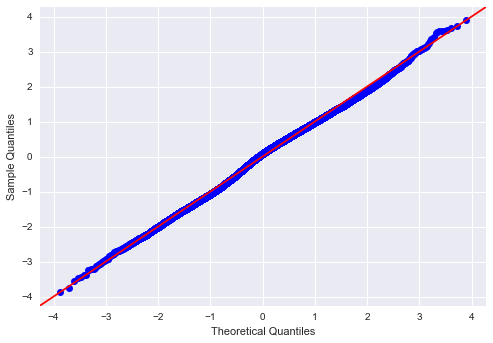

In [1582]:
#QQ plot
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

 From our QQ plot here, we can infer that our residuals are normally distributed, which is a good sign! But we'll also double check this with a normality plot below.

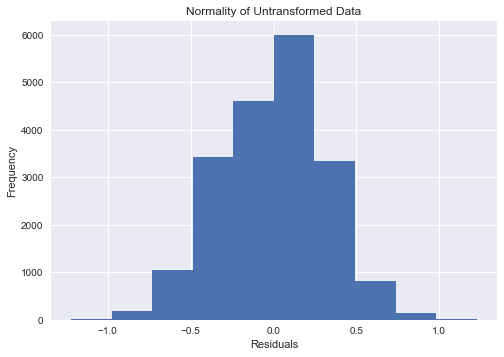

In [1583]:
#checking normality
plt.hist(model.resid)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Normality of Untransformed Data');

Our residuals are looking nice and normally distributed! This is a good sign since this means we don't have any high or low outliers as well as variances that are relatively equal!

# Conclusions
So what exactly can first time home buyer's expect to pay for a house in the King County region for a house with a condition of at least 3 and a grade between 6-10? Below is a function where people (both future home owners and those just curious) can type in a price amount and be able to see a predicted outcome of what their future home might look like. 

In [1584]:
#function to predict price from square footage

def predict_price(Living):
    p =  405915.3827540047+ 1.0470744109569372*Living
    return f"With the square footage of {Living}, predicted price is {round(p, 2)} dollars."

In [1585]:
#testing the function
predict_price(5000)

'With the square footage of 5000, predicted price is 411150.75 dollars.'